In [22]:
from skimage import io
from skimage.feature import blob_log
import os
import matplotlib.pyplot as plt
from skimage.morphology import white_tophat, disk
import numpy as np

In [13]:
image_dir = "/media/tool/moved_from_m2/cartana_test_stitched/results/tiled_ref"

In [49]:
def whiteFilter(image, radius):
    selem = disk(radius)
    image = white_tophat(image,selem)
    return image

In [50]:
def detectSpots(image, min_sigma=1, max_sigma=10):
    image = image.astype('uint8')
    blobs = blob_log(image, min_sigma=int(min_sigma), max_sigma=int(max_sigma))
    return blobs.astype(int)


In [51]:
image = io.imread("/media/tool/moved_from_m2/cartana_test_stitched/results/tiled_ref/REF_padded_tiled_37.tif")

In [52]:
blobs = detectSpots(whiteFilter(image,15))

/home/nacho/.local/lib/python3.8/site-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/home/nacho/.local/lib/python3.8/site-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/home/nacho/.local/lib/python3.8/site-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/home/nacho/.local/lib/python3.8/site-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))
/home/nacho/.local/lib/python3.8/site-packages/skimage/feature/blob.py:126: RuntimeWarning: invalid value encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/home/nacho/.local/lib/python3.8/site-packages/skimage/feature/blob.py:127: RuntimeWarning: invalid value encountered in

In [53]:
print(blobs)

[[ 192 1393    1]
 [1451  395    1]
 [ 194  488    1]
 ...
 [1465  523    1]
 [2110  856    1]
 [ 332 1151    1]]


In [61]:
print(image.shape)
empty_array = np.zeros(image.shape)


(2120, 2120)


In [62]:
for x in blobs:
    empty_array[x[0], x[1]] = 255

In [63]:
print(empty_array.shape)

(2120, 2120)


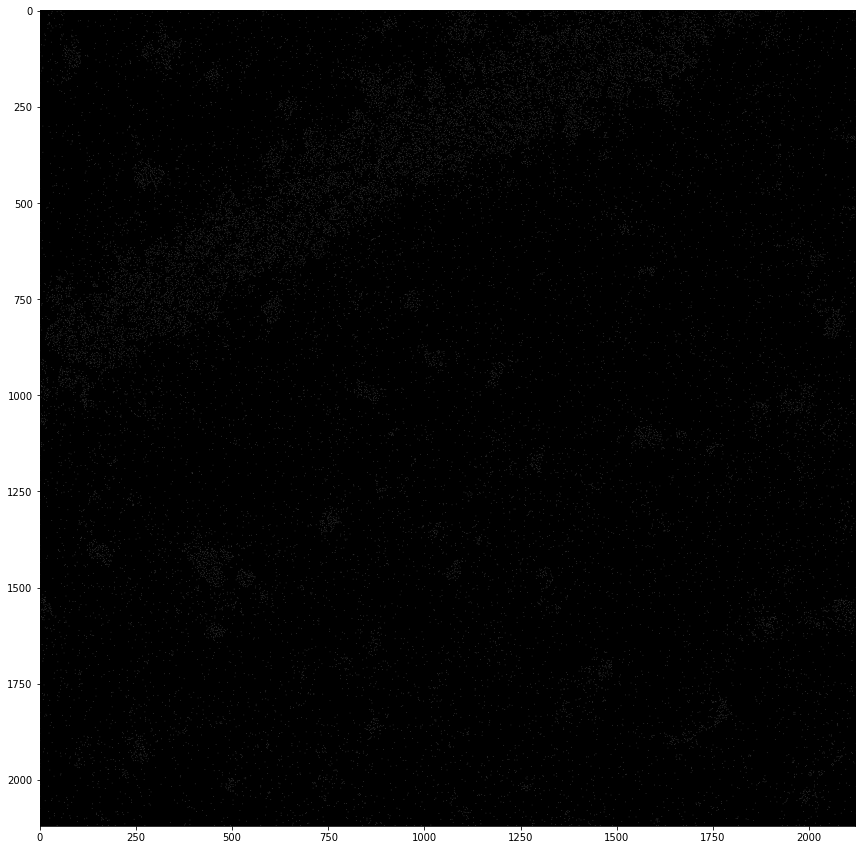

In [70]:
plt.imshow(empty_array, cmap='gray')
plt.rcParams['figure.figsize'] = [100, 100]
plt.savefig("/home/nacho/Documents/Code/communISS/empty_array.tif")

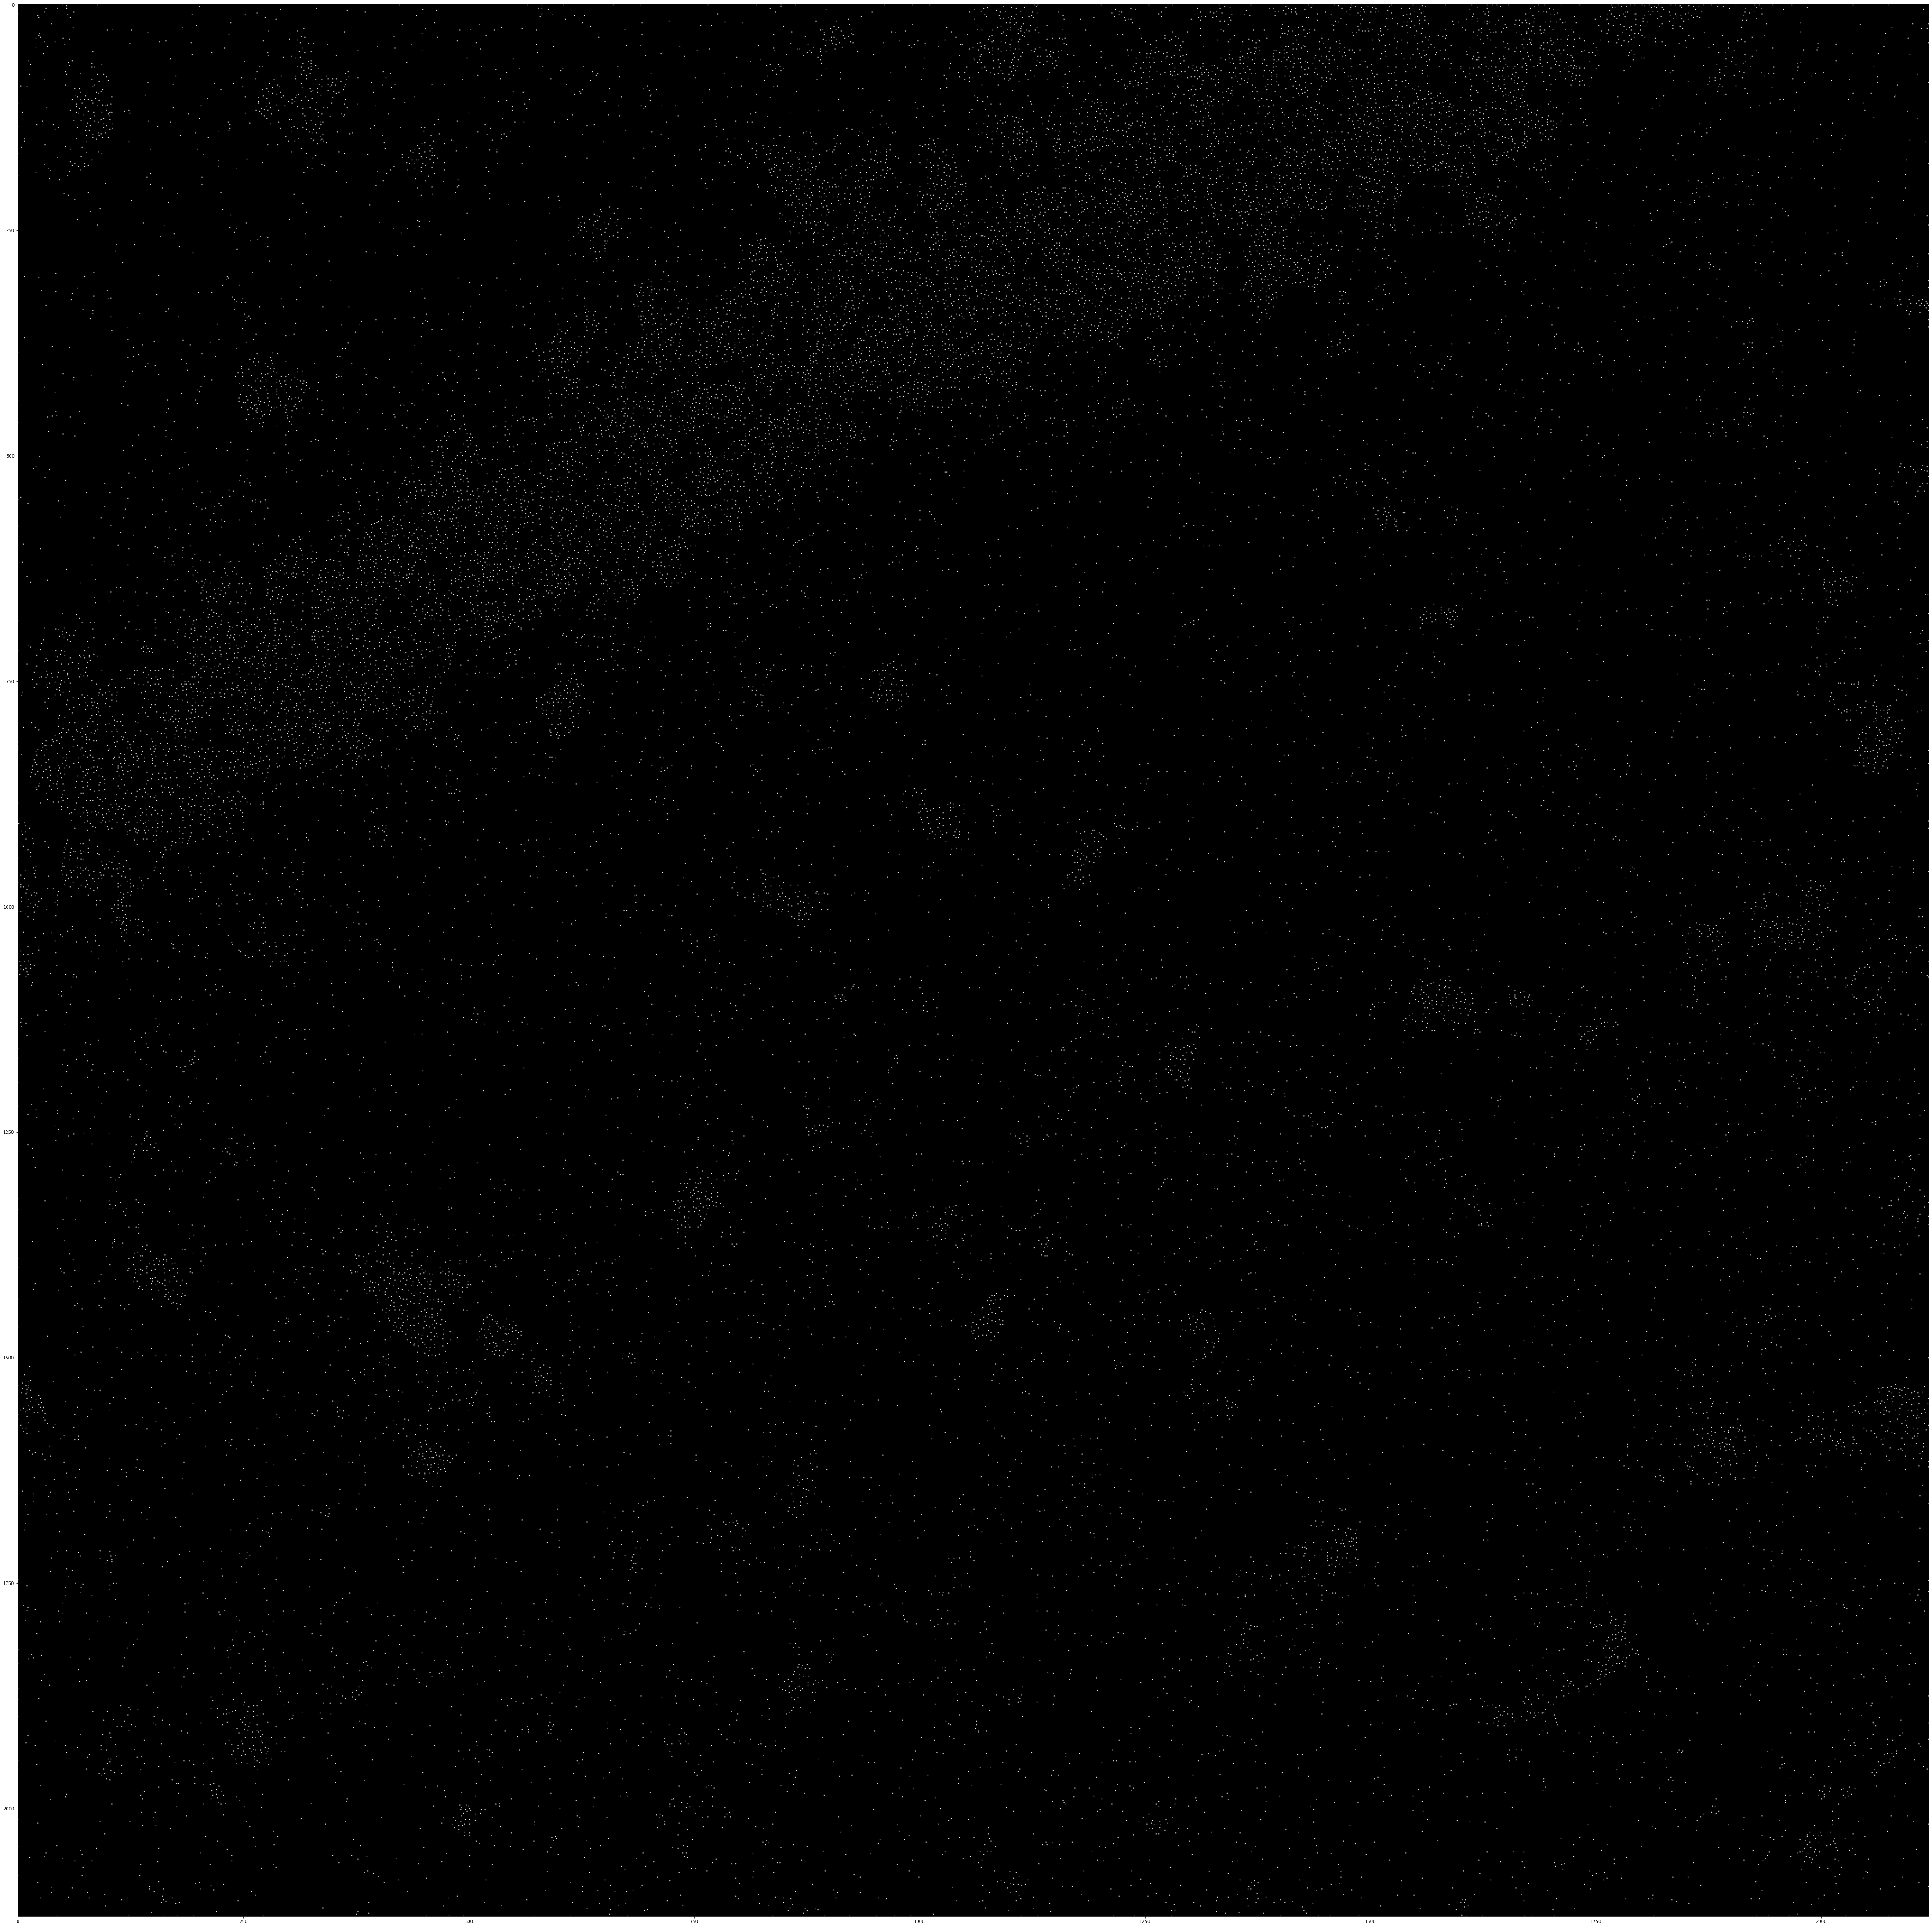

In [81]:
plt.rcParams['figure.figsize'] = [80, 80]
def allTogether():
    image = io.imread("/media/tool/moved_from_m2/cartana_test_stitched/results/tiled_ref/REF_padded_tiled_37.tif")
    blobs = detectSpots(whiteFilter(image,15), 1,10)
    empty_array = np.zeros(image.shape)
    for x in blobs:
        empty_array[x[0], x[1]] = 255
    plt.imshow(empty_array, cmap='gray')
    plt.savefig("/home/nacho/Documents/Code/communISS/empty_array.tif")
allTogether()